In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import cv2 as cv

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_datagen = datagen.flow_from_directory('../input/garbage-classification/Garbage classification/Garbage classification/',
                           target_size=(300, 300),
                           batch_size=128,
                           class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

In [6]:
from tensorflow.keras.optimizers import RMSprop, Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.003),
              metrics=['accuracy'])

In [7]:
history = model.fit(
      train_datagen,
      steps_per_epoch=8,  
      epochs=40,
      verbose=1)

Epoch 1/40
8/8 [==============================] - 20s 1s/step - loss: 4.7995 - accuracy: 0.1895
Epoch 2/40
8/8 [==============================] - 9s 1s/step - loss: 1.7208 - accuracy: 0.2603
Epoch 3/40
8/8 [==============================] - 8s 972ms/step - loss: 1.7831 - accuracy: 0.1914
Epoch 4/40
8/8 [==============================] - 11s 1s/step - loss: 1.7731 - accuracy: 0.2070
Epoch 5/40
8/8 [==============================] - 6s 773ms/step - loss: 1.9449 - accuracy: 0.2059
Epoch 6/40
8/8 [==============================] - 7s 830ms/step - loss: 1.7601 - accuracy: 0.1777
Epoch 7/40
8/8 [==============================] - 9s 1s/step - loss: 1.7457 - accuracy: 0.2021
Epoch 8/40
8/8 [==============================] - 7s 843ms/step - loss: 1.7411 - accuracy: 0.2051
Epoch 9/40
8/8 [==============================] - 6s 767ms/step - loss: 1.7293 - accuracy: 0.2305
Epoch 10/40
8/8 [==============================] - 6s 763ms/step - loss: 1.7079 - accuracy: 0.2559
Epoch 11/40
8/8 [============

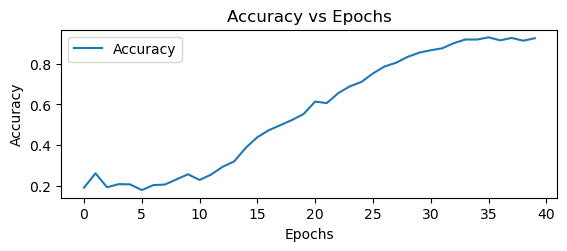

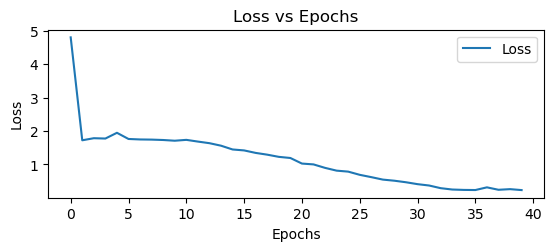

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend(['Accuracy'])
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend(['Loss'])
plt.show()

In [9]:
model.save('trash_module.h5')

In [10]:
import cv2,os
img_dir = '../input/garbage-classification/Garbage classification/Garbage classification/metal'
imgs_name = os.listdir(img_dir)
t_dict=train_datagen.class_indices
classes=list(t_dict.keys()) 
print(classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [12]:
count = 0
for img_name in imgs_name:
    count+=1
    orig = cv2.imread(img_dir+'/'+img_name) 
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = orig* 1.0 / 255.0
    orig = cv2.resize(orig, (300, 300),
                   interpolation = cv2.INTER_NEAREST)
    img = tf.expand_dims(orig, axis=0)
    result = model.predict(img)
    result = result.argmax(1)
    class_name_pred=classes[result[0]]
    print(class_name_pred)
    if count == 10:
        break

1/1 [==============================] - 0s 23ms/step
metal
1/1 [==============================] - 0s 20ms/step
metal
1/1 [==============================] - 0s 20ms/step
metal
1/1 [==============================] - 0s 22ms/step
metal
1/1 [==============================] - 0s 21ms/step
metal
1/1 [==============================] - 0s 25ms/step
metal
1/1 [==============================] - 0s 20ms/step
metal
1/1 [==============================] - 0s 19ms/step
metal
1/1 [==============================] - 0s 19ms/step
metal
1/1 [==============================] - 0s 20ms/step
metal
